### Install Packages and Import Dataset

We’ll be using the same dataset of 932 real estate transactions in Sacramento, California, which includes features such as property location, size, and type, just like in our Linear Regression Session. Our goal remains to predict the target variable, Price, based on these features.

This dataset was obtained from [spatialkey](https://support.spatialkey.com/spatialkey-sample-csv-data/)


In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In our previous session, we learned that linear regression aims to find the line of best fit, which is the line that minimizes the sum of squared differences between the observed data points and the predicted values. This process works well when there is a clear linear relationship between the predictor variable (independent variable) and the response variable (dependent variable). However, linear regression will still attempt to fit a line even when the data is randomly scattered without a clear trend.

This behavior occurs because linear regression doesn't make any assumptions about the underlying relationship between the variables—it simply seeks the line that minimizes the error (the residuals). Even if the data doesn't follow a linear pattern, the algorithm will still produce a line that "fits" the data in the sense of minimizing the sum of squared residuals, but this line may not be meaningful or useful for making predictions.

For example, in cases where the data is scattered without a clear trend (i.e., the relationship between the variables is not linear), the line produced by linear regression might not reflect the true nature of the data. In these situations, the line may mislead us into thinking that there is some form of linear relationship when, in fact, there is none.

![linear regression](./images/scatter_plot_no_relationship.png)

Therefore, it's essential to test the significance of the fitted line (specifically, the slope coefficient $\beta$) to determine whether it actually provides a meaningful relationship between the predictor and the response variable. 

Hypothesis testing allows us to assess if the slope of the line is significantly different from $0$, which would suggest a meaningful linear relationship. If the slope is not significantly different from $0$, it indicates that the linear model is not a good fit for the data.

#### Our question is inferential: 
**Is there a relationship between the size of a house and its sale price?**

The equation for the straight line is:

$$
\text{House sale price} = \beta_0 + \beta_1 \times (\text{house size})
$$

where:

- $ \beta_0 $ is the price when the house size is 0 (the intercept).
- $ \beta_1 $ is how much the price increases for each unit increase in house size (the slope).

We need to perform hypothesis testing to determine if the relationship between the predictor (e.g., square footage) and the response variable (e.g., price) is statistically significant.


#### **Set the Hypotheses**

Before performing any calculations, we define two competing hypotheses: the null hypothesis and the alternative hypothesis.

The null hypothesis states that there is no significant linear relationship between the predictor and the target variable. Mathematically, we express this as:

$$
H_0: \beta_1 = 0 
$$
This means that the slope is zero, and there is no effect of the predictor variable on the response variable.


The alternative hypothesis states that there is a significant linear relationship between the predictor and the target variable:
$$
H_1: \beta_1 \neq 0 
$$
This means that the slope is not zero, and there is an effect of the predictor variable on the response variable.


We'll begin by loading in our dataset.

In [12]:
sacramento = pd.read_csv("/Users/christineromano/DSI_Course/DSI_LCR_Module/LCR/01_materials/notebooks/dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


This question guides our initial exploration: the columns in the data that we are interested in are 
- **sq__ft** (house size, in livable square feet)
-  **price** (house sale price, in US dollars (USD)). 

#### **How we do perform it?**

We can perform simple linear regression in Python using `statsmodels` package. The `statsmodels` package is a powerful library used for performing statistical analysis and modeling in Python. 

It provides tools for fitting a wide variety of statistical models, performing hypothesis tests, and visualizing data. `statsmodels` is particularly popular for its ease of use in statistical modeling and inference!

`statsmodels` provides a formula interface that allows you to specify models in a familiar formula syntax (similar to R), which makes it easy to specify the model and interact with your data.

> model(response variable ~ predictor, data).fit()

In [13]:
# Simple linear regression formula
model = smf.ols("price ~ sq__ft", data=sacramento).fit()

*Wait, what is OLS?*

Ordinary Least Squares (OLS) is a method used to find the best-fitting line through a set of data points. Imagine you have a scatter plot of data points, and you want to draw a line that best represents the overall trend of the data. OLS helps determine the slope and position of that line by minimizing the total distance (errors) between the data points and the line.

In simpler terms, it’s like trying to draw a line that gets as close as possible to all the points without going too far from any of them. OLS does this by adjusting the line so that the sum of the squared differences between the observed values and the line is as small as possible. This way, you get the most accurate line to predict or explain the relationship between the variables.

After fitting our model, we can view the summary of the model, which includes importatnt statistics like R-squared, p-values, F-statistics of our model fit and t-statistics for our significance of variables!

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     917.9
Date:                Thu, 18 Sep 2025   Prob (F-statistic):          1.88e-135
Time:                        20:09:30   Log-Likelihood:                -10351.
No. Observations:                 813   AIC:                         2.071e+04
Df Residuals:                     811   BIC:                         2.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.62e+04   7611.940      2.128      0.0

The output of `model.summary()` will display several useful statistics:

- Coefficients: These show the estimated values for the intercept and slope of the regression line.
- Standard Errors: The standard errors of the estimated coefficients.
- t-values and p-values: Used to assess the statistical significance of the coefficients.
- R-squared: A measure of how well the model explains the variance in the target variable.
- Confidence Intervals: For each coefficient, showing the range of values in which the true coefficient might lie.

Here are some things we can note.

- The **Coef (Coefficient)** column indicates that for each additional square foot of house size, the price increases by 125.2165 units (likely dollars).

- The **Std err (Standard Error)** of 4.562 suggests that the true value of the coefficient could fall within a range of 125.2165 ± 4.562, reflecting the uncertainty of the coefficient estimate.

- The **t** value of 27.445 is very large, suggesting a strong, statistically significant relationship between house size and price.

- The **P>|t|** column shows a p-value of 0.000, confirming that this coefficient is statistically significant and not due to random chance.

- The **[0.025, 0.975]** columns represent the 95% confidence interval (116.261 to 134.172), meaning we are 95% confident that the true price increase per square foot falls within this range.

- The **R-squared** value of 0.481 means that about 48.1% of the variance in house prices can be explained by the predictor (house size).

- The **F-statistic** of 753.2, with a corresponding p-value of 7.67e-118, indicates that the overall model is highly significant.

Next, let's visualize our results!


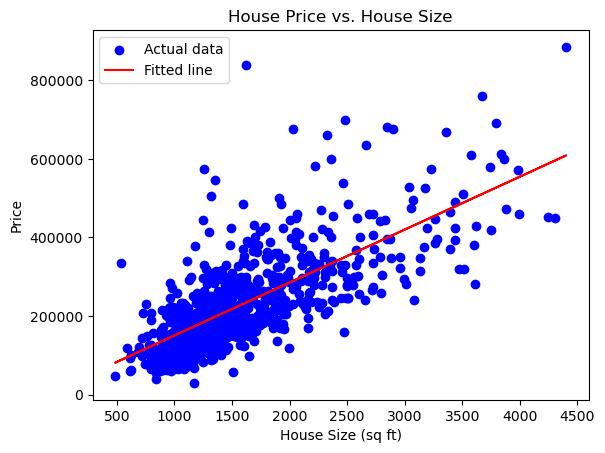

In [15]:
# Predict the values based on the model
predictions = model.predict(sacramento[["sq__ft"]])

# Plotting the data and the regression line
plt.scatter(sacramento[["sq__ft"]], sacramento["price"], color='blue', label='Actual data')  # Scatter plot of actual data
plt.plot(sacramento[["sq__ft"]], predictions, color='red', label='Fitted line')  # Regression line
plt.title('House Price vs. House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.show()

This plot gives a clear visual of how well house size predicts price in the data. The regression line provides a summary of the linear trend, and the scatter plot highlights individual data points. You can see that although there is a general upward trend, there’s some variability in the actual prices for houses of the same size.

### **Multivariable Linear Regression**

We can extend our model to include multiple predictors! For example, lets say we now want to include both house size and number of bedrooms as predictors in our model

$$
\text{y} = \beta_0 + \beta_1(x_1) + \beta_2(x_2)
$$

  where:
  $\text{y}$ is the response variable.
 $\beta_0$ is the vertical intercept.
  $\beta_1$ is the slope for predictor 1 (e.g., ($x_1$) house size)
  $\beta_2$ is the slope for predictor 2 (e.g., ($x_2$) number of bedrooms)


To do this, We just simply add the predictor variables to our model, separated by a plus sign `(+)`
> model(response variable ~ predictor1 + predictor2, data).fit()

In [16]:
# Multivariable linear regression formula
multi_model = smf.ols("price ~ sq__ft + beds", data=sacramento).fit()

In [17]:
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     482.9
Date:                Thu, 18 Sep 2025   Prob (F-statistic):          8.39e-139
Time:                        20:09:30   Log-Likelihood:                -10340.
No. Observations:                 813   AIC:                         2.069e+04
Df Residuals:                     810   BIC:                         2.070e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.624e+04   1.12e+04      5.010      0.0

### 1. **Square Footage (sq__ft)**:
- **Coef (Coefficient)**: The coefficient for square footage is **135.1051**, which means for every additional square foot of house size, the price increases by approximately **$135.11**, holding the number of bedrooms constant. This means that if you were to compare two houses with the same number of bedrooms, the one with more square footage would be valued higher.
- **Std err (Standard Error)**: The standard error of **6.336** for square footage suggests that the true price increase per square foot could vary by **±6.336**. This shows a relatively low level of uncertainty around the estimate of the coefficient.
- **t-value**: The t-value for square footage is **21.324**, which is quite large. This indicates a very strong and statistically significant relationship between house size and price.
- **P>|t|**: The p-value for square footage is **0.000**, confirming that the relationship between house size and price is highly statistically significant and not due to random chance.
- **[0.025, 0.975] (95% Confidence Interval)**: The 95% confidence interval for square footage is **(122.669, 147.542)**. This means we are 95% confident that the true price increase per square foot falls within this range.
  
### 2. **Number of Bedrooms (beds)**:
- **Coef (Coefficient)**: The coefficient for the number of bedrooms is **-11,070.00**, meaning that each additional bedroom is associated with a **decrease of $11,070** in house price, holding square footage constant. This means that when comparing two houses with the same square footage, adding one more bedroom would decrease the price.
- **Std err (Standard Error)**: The standard error for the number of bedrooms is **4,935.753**, which is larger than the standard error for square footage, indicating more uncertainty about the coefficient's estimate. 
- **t-value**: The t-value for the number of bedrooms is **-2.243**, which is still statistically significant, but the effect is weaker compared to square footage.
- **P>|t|**: The p-value for the number of bedrooms is **0.025**, indicating that the relationship between the number of bedrooms and price is statistically significant, but the effect is weaker than that of square footage.
- **[0.025, 0.975] (95% Confidence Interval)**: The 95% confidence interval for the number of bedrooms is **(-20,800, -1,384)**, meaning we are 95% confident that each additional bedroom decreases the house price by somewhere between **$1,384 and $20,800**.

### Overall Model Fit:
- The **Adjusted- R-squared** value of 0.483 means that about 48.3% of the variance in house prices can be explained by the predictors (house size and number of bedrooms). Note, here we are looking at adjusted R-squared, as it provides a more realistic measure of model quality by considering both the goodness of fit and the complexity of the model. It helps avoid overfitting by penalizing unnecessary predictors.

- The **F-statistic** of 381.0, with a corresponding p-value of 2.15e-117, indicates that the overall model is highly significant.

### **Inclusion of a categorical predictor**

Now, let's say we are also interested in whether the house **type** is a significant predictor of price. First let’s look at our categorical variable.

In [18]:
sacramento["type"].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

As we observe, the **type** column contains three unique categories: residential, multi-family, and condo. Since linear regression models require numerical inputs, we need to convert this categorical variable into a suitable numerical format.

To include **type** as a predictor in our model, we'll apply **one-hot encoding**. This technique transforms categorical variables into a set of binary (0 or 1) columns, each corresponding to one of the categories. This allows the model to correctly interpret the variable.

We will use the `pandas.get_dummies()` function to perform the encoding.

In [19]:
sacramento_encoded = pd.get_dummies(sacramento, columns=['type'], drop_first=True)

To avoid multicollinearity, we use the argument `drop_first=True` when performing one-hot encoding. Multicollinearity can arise when the reference category is fully represented by the other dummy variables, which can distort the results of the regression model. By dropping the first category, we ensure that the model doesn't suffer from this issue, while still retaining all the relevant information.

After applying `get_dummies()`, we can inspect the output in the `sacramento_encoded` dataframe. 

In [20]:
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767,False,True
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916,False,True
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231,False,True
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522,False,True
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,False,True
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352,False,True
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224,False,True
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010,False,True


You'll notice that each of the categories from the **type** variable now has its own column: one for **multi-family** and one for **residential**. The category, **condo**, is dropped to avoid multicollinearity. The presence of each category is now represented as a binary value (0 or 1), allowing the model to use these encoded values as predictors.

With the **type** variable properly encoded, we can proceed with preparing the dataset for the linear regression model, using **sq__ft** (house size) and the encoded **type** columns as predictors.

> Note. If we wanted to change the reference group, we wouldn't specify `drop_first=True`. Instead, we would manually drop the group we want to set as the reference category. For example, if we wanted to make **multi-family** the reference category instead of **condo**, we would first encode the **type** variable using `get_dummies()` without `drop_first=True` and then manually drop the **multi-family** column. This way, **multi-family** would become the reference group, and the other categories (such as **residential** and **condo**) would be compared to it in the model.

With our type variable now properly encoded, we can move on to preparing our dataset for the linear regression model, using  the sq__ft (house size), number of bedrooms, and the encoded type all as predictors. 

In [21]:
# Rename columns to replace hyphens with underscores for ease
sacramento_encoded.columns = sacramento_encoded.columns.str.replace('-', '_')

# Now fit the model using the new column names
multi_cat_model = smf.ols("price ~ sq__ft + beds + type_Multi_Family + type_Residential", data=sacramento_encoded).fit()

In [22]:
print(multi_cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 18 Sep 2025   Prob (F-statistic):          8.92e-139
Time:                        20:09:30   Log-Likelihood:                -10334.
No. Observations:                 813   AIC:                         2.068e+04
Df Residuals:                     808   BIC:                         2.070e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

When dealing with categorical predictors in a regression model, the interpretation of the coefficients is slightly different from continuous predictors. 

Here, one of the categories is automatically chosen as the reference group. This reference group does not have a separate coefficient assigned to it in the output. Instead, its effect is captured in the coefficients of other categories reflect the difference in the outcome variable (e.g., house price) relative to the reference group.

For example, in the case of the type variable with categories: Residential, Multi-Family, and Condo. If Condo is our reference category, the coefficients for Multi-Family and Residential would tell us how the house price differs from Condo.

### 1. **Multi-Family (type_Multi_Family)**:
- **Coef (Coefficient)**: The coefficient for **Multi-Family** is **-21,720**, meaning that **Multi-Family** properties are predicted to be **$21,720 less** in price than **Condo** properties, holding square footage and number of bedrooms constant. 
- **Std err (Standard Error)**: The standard error for **Multi-Family** is **29,000**, suggesting that the true price difference could vary by **±29,000**. This high level of uncertainty shows that we cannot confidently rely on this estimate.
- **t-value**: The t-value for **Multi-Family** is **-0.748**, which is quite small and indicates a weak relationship between **Multi-Family** properties and price.
- **P>|t|**: The p-value for **Multi-Family** is **0.455**, which is much higher than the common significance level of **0.05**. This indicates that the coefficient is not statistically significant and the price difference between **Multi-Family** and **Condo** properties is likely due to random chance.
- **[0.025, 0.975] (95% Confidence Interval)**: The 95% confidence interval for **Multi-Family** is **(-78,700, 35,300)**. Since this range includes zero, it further suggests that the difference in price between **Multi-Family** and **Condo** properties is not significant.

### 2. **Residential (type_Residential)**:
- **Coef (Coefficient)**: The coefficient for **Residential** is **31,830**, meaning that, **Residential** properties are predicted to be **$31,830 more** in price than **Condo** properties, holding square footage and number of bedrooms constant. This indicates that **Residential** properties tend to be more expensive than **Condo** properties.
- **Std err (Standard Error)**: The standard error for **Residential** is **14,600**, suggesting that the true price difference could vary by **±14,600**. This reflects a moderate level of uncertainty in the estimate.
- **t-value**: The t-value for **Residential** is **2.174**, which indicates a meaningful relationship between **Residential** properties and price.
- **P>|t|**: The p-value for **Residential** is **0.030**, which is below the typical threshold of **0.05**, confirming that the difference in price between **Residential** and **Condo** properties is statistically significant.
- **[0.025, 0.975] (95% Confidence Interval)**: The 95% confidence interval for **Residential** is **(3,095, 60,600)**. This interval does not include zero, further suggesting that the price difference between **Residential** and **Condo** properties is statistically significant.

### Summary:
- **Multi-Family** properties are not significantly different from **Condo** properties in terms of price, as evidenced by the high p-value and wide confidence interval.
- **Residential** properties are significantly more expensive than **Condo** properties, with a positive and statistically significant coefficient, suggesting that house type is an important predictor of price.